#### https://youtu.be/8mkh4uGxNfo?feature=shared - Строим Нейронную Сеть для Распознавания Изображений за 20 минут

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# импортируем модули и библиотеки
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt # для работы с массивами и визуализацией рисунков
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import  fashion_mnist # этот модуль уже есть в Керасе
from tensorflow.keras.models import Sequential # модель нейросетей, где слои идут друг за другом
from tensorflow.keras.layers import Dense, Dropout #3 тип слоев Dense означает, что слои будут полносвязными

In [3]:
# делим наш датасет на обучающую и тестовую выборку
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dreess', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Предварительная обработка данных


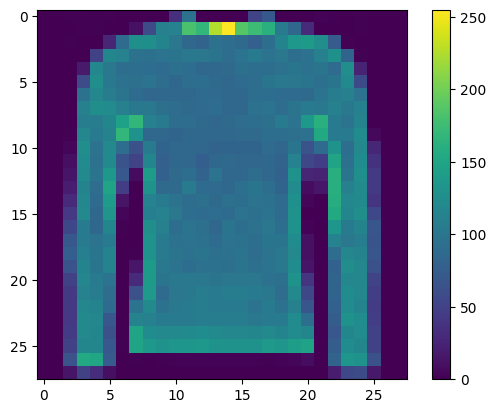

In [6]:
# Посмотрим, как выглядят изображения
plt.figure()
plt.imshow(x_train[37]) # сюда вставляем индекс от 0 до 59999
plt.colorbar()
plt.grid(False)

In [7]:
# нормализация данных
x_train = x_train / 255 # делим интенсивность каждого пикселя на 255, чтобы данные (вертикальная полоса сбоку)
                        # на входе в НС находились в диапазоне от 0 до 1 (проверим ниже)

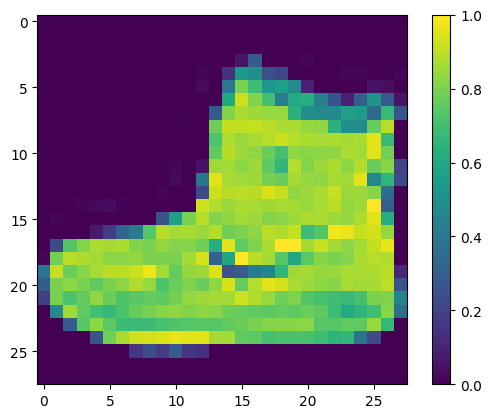

In [8]:
plt.figure()
plt.imshow(x_train[0]) # сюда вставляем индекс от 0 до 59999
plt.colorbar()
plt.grid(False)

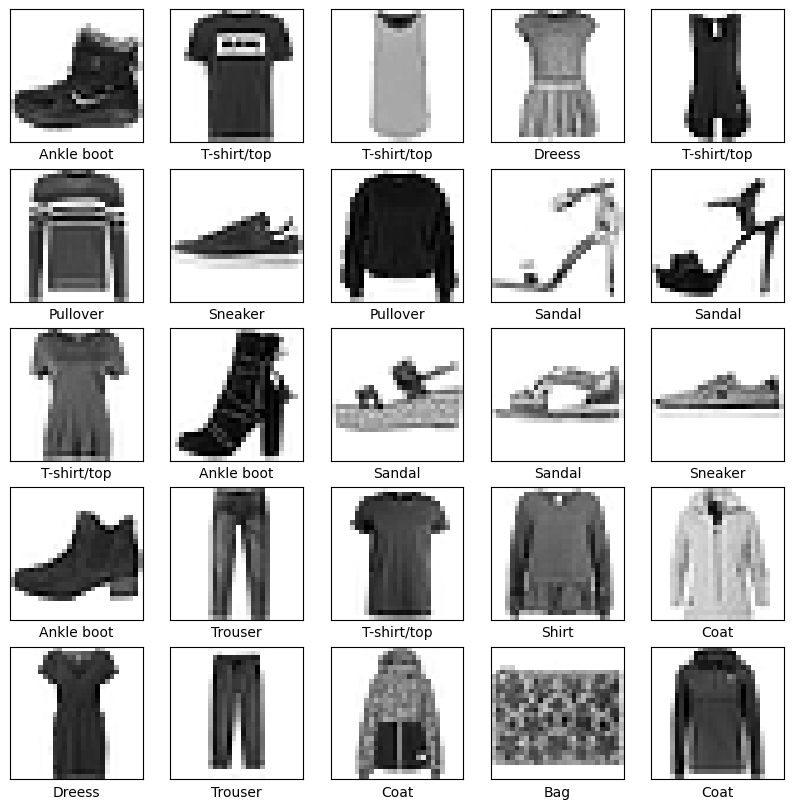

In [9]:
# посмотрим несколько изображений
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary) # команда cmap=plt.cm.binary делает рисунки черно-белыми
    plt.xlabel(class_names[y_train[i]])

In [10]:
# создание модели нейронной сети. Тип Sequential означает, что наши слои будут идти последовательно
model = keras.Sequential([
    # первый слой сети преобразует формат изображения из 2D-массива в 1D-массива, т.е. в строку 28 * 28 = 784
    keras.layers.Flatten(input_shape=(28, 28)),
    # два полноценных слоя: 1 - входной поносвязный, 2 - выходной полносвязный
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    # благодаря ф.а. softmax возвращается массив из 10 вер-х оценок (1 из 10 классов)
])

In [11]:
# компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary() # напечатать параметры модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# обучение модели
model.fit(x_train, y_train, epochs=10)
# чем более разнообразный датасет, тем больше надо эпох

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7468 - accuracy: 0.7560
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5109 - accuracy: 0.8267
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4676 - accuracy: 0.8392
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4423 - accuracy: 0.8479
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4250 - accuracy: 0.8529
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4108 - accuracy: 0.8570
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4001 - accuracy: 0.8606
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3895 - accuracy: 0.8647
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3811 - accuracy: 0.8658
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.37

In [14]:
# проверка точности предсказания
# использовали 60 тысяч изображений, а 10 тысяч - в тестовой выборке
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 79.5210 - accuracy: 0.8048
Test accuracy:  0.8047999739646912


In [15]:
# будем предсказывать
predictions = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [16]:
predictions[12]

array([1.0264020e-04, 1.0787071e-04, 8.0666548e-05, 2.2731443e-05,
       6.2168700e-05, 9.7889090e-01, 6.2017317e-04, 1.4745423e-02,
       1.1825883e-03, 4.1848300e-03], dtype=float32)

In [17]:
np.argmax(predictions[12])

5

In [18]:
y_train[5]

2

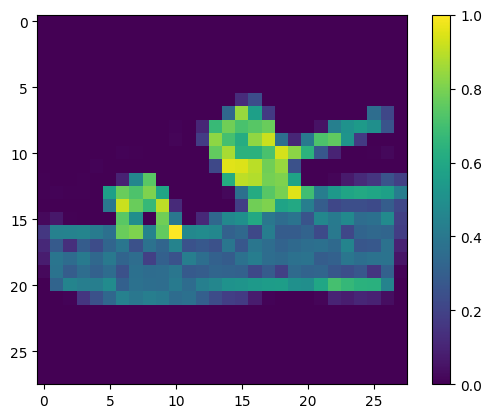

In [19]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)

In [20]:
class_names[np.argmax(predictions[12])]

'Sandal'

Что мы сделали:
1. Импортировали изображения
2. Поделили их на обучающую и тестовую выборки
3. Немного оптимизировали эти изображения
4. Создали архитектуру нейронной сети, которая состояла из трёх слоев
5. Скомпилировали её (указали параметры обучения)
6. Обучили нашу НС с помощью обучающей выборки
7. Протестировали её на нашей тестовой выборке.